In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the time series data
data = pd.read_csv("/content/active_market_walletvs sales in usd.csv")  # Replace with the actual file name or path

# Select only the 'DateTime' and 'Sales USD' columns
data = data[['DateTime', 'Sales USD']]

# Convert 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Set 'DateTime' column as the index
data.set_index('DateTime', inplace=True)

# Normalize the 'Sales USD' values using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the training data
sequence_length = 30  # Number of previous days to consider for prediction
X_train, y_train = [], []

for i in range(sequence_length, len(data)):
    X_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to match the expected input shape of the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))

model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the input data for prediction
last_sequence = scaled_data[-sequence_length:]
X_pred = np.array([last_sequence])
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

# Make predictions for the next 30 days
predictions = []
for _ in range(30):
    prediction = model.predict(X_pred)
    predictions.append(prediction[0, 0])
    X_pred = np.append(X_pred, [[[prediction[0, 0]]]], axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform([predictions])[0]

# Print the predicted sales USD for the next 30 days
print(predictions)


Epoch 1/50
11/11 [==============================] - 6s 36ms/step - loss: 0.0313
Epoch 2/50
11/11 [==============================] - 0s 38ms/step - loss: 0.0192
Epoch 3/50
11/11 [==============================] - 1s 56ms/step - loss: 0.0180
Epoch 4/50
11/11 [==============================] - 1s 61ms/step - loss: 0.0170
Epoch 5/50
11/11 [==============================] - 1s 66ms/step - loss: 0.0171
Epoch 6/50
11/11 [==============================] - 1s 60ms/step - loss: 0.0165
Epoch 7/50
11/11 [==============================] - 1s 60ms/step - loss: 0.0169
Epoch 8/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0171
Epoch 9/50
11/11 [==============================] - 1s 60ms/step - loss: 0.0163
Epoch 10/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0159
Epoch 11/50
11/11 [==============================] - 1s 62ms/step - loss: 0.0161
Epoch 12/50
11/11 [==============================] - 1s 63ms/step - loss: 0.0158
Epoch 13/50
11/11 [==================

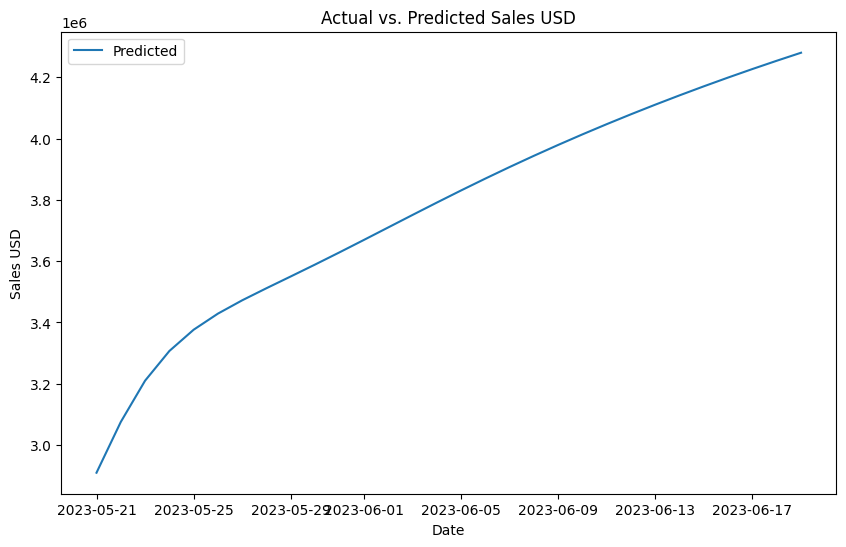

In [18]:
# Prepare the dates for plotting
dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

# Plot the old and predicted values
plt.figure(figsize=(10, 6))
# plt.plot(data.index, data['Sales USD'], label='Actual')
plt.plot(dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales USD')
plt.title('Actual vs. Predicted Sales USD')
plt.legend()
plt.show()

In [19]:
import json

sales_usd = [2909408.26386851, 3075249.97923988, 3209946.29243958, 3306864.66961764, 3376323.96171412,
             3428885.26972083, 3472379.02757125, 3511884.4206207, 3550328.19662376, 3589126.86478066,
             3628739.89361659, 3669088.01646708, 3709838.03521279, 3750584.43828609, 3790952.03014189,
             3830637.09429744, 3869427.14046628, 3907189.22315503, 3943855.20084514, 3979407.27330317,
             4013855.73128909, 4047233.6721119, 4079582.25881139, 4110944.04507059, 4141361.30644387,
             4170872.98094184, 4199513.55651675, 4227312.23667657, 4254297.3905433, 4280489.32150819]

json_objects = []
for value in sales_usd:
    json_objects.append({'Sales USD': value})

json_data = json.dumps(json_objects)

print(json_data)


[{"Sales USD": 2909408.26386851}, {"Sales USD": 3075249.97923988}, {"Sales USD": 3209946.29243958}, {"Sales USD": 3306864.66961764}, {"Sales USD": 3376323.96171412}, {"Sales USD": 3428885.26972083}, {"Sales USD": 3472379.02757125}, {"Sales USD": 3511884.4206207}, {"Sales USD": 3550328.19662376}, {"Sales USD": 3589126.86478066}, {"Sales USD": 3628739.89361659}, {"Sales USD": 3669088.01646708}, {"Sales USD": 3709838.03521279}, {"Sales USD": 3750584.43828609}, {"Sales USD": 3790952.03014189}, {"Sales USD": 3830637.09429744}, {"Sales USD": 3869427.14046628}, {"Sales USD": 3907189.22315503}, {"Sales USD": 3943855.20084514}, {"Sales USD": 3979407.27330317}, {"Sales USD": 4013855.73128909}, {"Sales USD": 4047233.6721119}, {"Sales USD": 4079582.25881139}, {"Sales USD": 4110944.04507059}, {"Sales USD": 4141361.30644387}, {"Sales USD": 4170872.98094184}, {"Sales USD": 4199513.55651675}, {"Sales USD": 4227312.23667657}, {"Sales USD": 4254297.3905433}, {"Sales USD": 4280489.32150819}]


In [20]:
import json

# Inverse transform the predictions
predictions = scaler.inverse_transform([predictions])[0]

# Prepare the dates for plotting
dates = pd.date_range(start=data.index[-1], periods=31, freq='D')[1:]

# Create an array of objects for datetime and prediction
result = []
for date, prediction in zip(dates, predictions):
    result.append({'DateTime': str(date), 'Prediction': prediction})

# Convert the array of objects to a JSON string
json_data = json.dumps(result)

# Print the JSON data
print(json_data)


[{"DateTime": "2023-05-21 00:00:00", "Prediction": 54303807718030.11}, {"DateTime": "2023-05-22 00:00:00", "Prediction": 57399226346611.445}, {"DateTime": "2023-05-23 00:00:00", "Prediction": 59913319234193.555}, {"DateTime": "2023-05-24 00:00:00", "Prediction": 61722290815903.44}, {"DateTime": "2023-05-25 00:00:00", "Prediction": 63018741387474.445}, {"DateTime": "2023-05-26 00:00:00", "Prediction": 63999792817039.16}, {"DateTime": "2023-05-27 00:00:00", "Prediction": 64811599351816.7}, {"DateTime": "2023-05-28 00:00:00", "Prediction": 65548963466152.305}, {"DateTime": "2023-05-29 00:00:00", "Prediction": 66266512607069.03}, {"DateTime": "2023-05-30 00:00:00", "Prediction": 66990685773681.98}, {"DateTime": "2023-05-31 00:00:00", "Prediction": 67730058898945.82}, {"DateTime": "2023-06-01 00:00:00", "Prediction": 68483152478688.625}, {"DateTime": "2023-06-02 00:00:00", "Prediction": 69243747404145.41}, {"DateTime": "2023-06-03 00:00:00", "Prediction": 70004274843446.984}, {"DateTime": "

Cloning into 'prophet'...
remote: Enumerating objects: 5704, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 5704 (delta 109), reused 123 (delta 65), pack-reused 5507
Receiving objects: 100% (5704/5704), 58.72 MiB | 27.40 MiB/s, done.
Resolving deltas: 100% (3658/3658), done.
python3: can't open file '/content/setup.py': [Errno 2] No such file or directory


ModuleNotFoundError: ignored

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Data

Finding best initial lr:   0%|          | 0/216 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predicted Active Market Wallets: 2023-06-01    1.086664e-79
2023-06-02    8.121069e-80
2023-06-03    8.814766e-80
Freq: D, Name: predicted_mean, dtype: float64


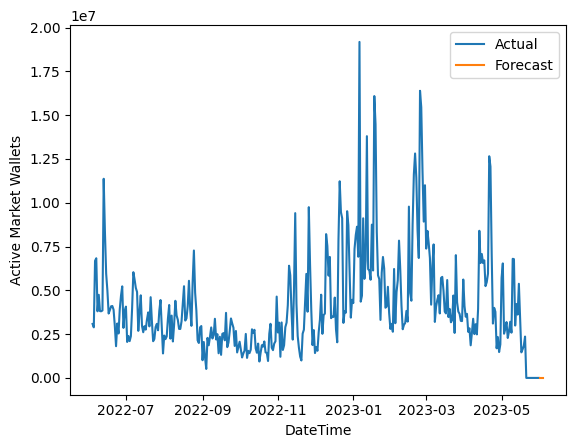